In [291]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [292]:
df = pd.read_csv('EDA1.csv')
df.drop(columns = ['Day'], axis = 1, inplace = True)
well_2 = df[df['Well Name'] == 2]
well_2.drop(columns = ['Well Name'], axis = 1, inplace = True)
well_2.reset_index(inplace = True, drop = True)
well_2 = pd.Series(data = well_2['Oil Volume'])
well_2 = well_2[well_2 > 0]
well_2.reset_index(inplace = True, drop = True)

C:\Users\csmid\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [293]:
#This function detects outliers
from numpy import percentile
multiplier = .9
def outlier_finder(data, timesteps, multiplier):
    outliers_index = []
    outliers_value = []
    for i in range(0, 1098, timesteps):
        q25 = percentile(data[i:i+timesteps], 25)
        q75 = percentile(data[i:i+timesteps], 75)
        iqr = q75 - q25
        cut_off = iqr * multiplier
        lower, upper = q25 - cut_off, q75 + cut_off
        outliers = [x for x in data[i:i+timesteps] if x < lower or x > upper]
        outliers_value.extend(outliers)
        for idx, val in enumerate(data[i:i+timesteps]):
            if val in outliers:
                outliers_index.append(idx + i)
    index = outliers_index
    value = outliers_value
    return index, value

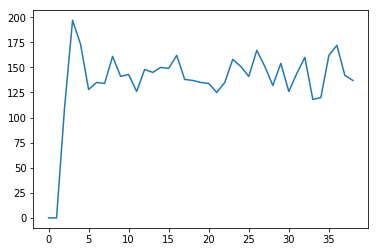

In [294]:
#Plots the number of outliers the outlier finder function detects at different timesteps 
num_of_outliers = []
for i in range(1,40):
    x, y = outlier_finder(well_2, i, multiplier)
    length = len(x)
    num_of_outliers.append(length)
plt.plot(num_of_outliers) 

Now that I have a function that can detect outliers, I plan to manually select outliers and see if the algorithm will return the outliers I have chosen

Text(0,0.5,'Production (BBL)')

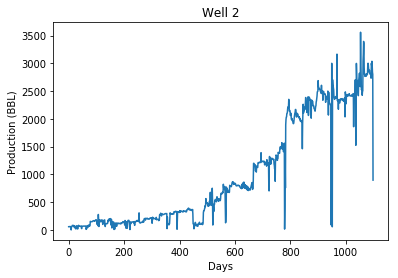

In [295]:
plt.plot(well_2)
plt.title('Well 2')
plt.xlabel('Days')
plt.ylabel('Production (BBL)')

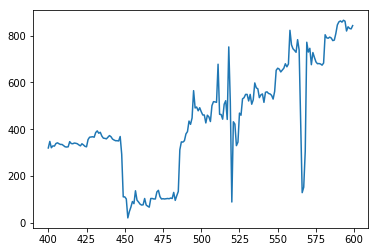

In [296]:
plt.plot(well_2[400:600])

In [297]:
well_2[515:530]

515    507.0
516    522.0
517    442.0
518    752.0
519    518.0
520     89.0
521    432.0
522    422.0
523    330.0
524    345.0
525    469.0
526    460.0
527    530.0
528    535.0
529    549.0
Name: Oil Volume, dtype: float64

index 520 looks like an outlier

In [298]:
well_2[560:575]

560    744.0
561    737.0
562    729.0
563    783.0
564    739.0
565    430.0
566    129.0
567    152.0
568    306.0
569    772.0
570    730.0
571    746.0
572    676.0
573    728.0
574    707.0
Name: Oil Volume, dtype: float64

index 566 and 567 also look like outliers

In [299]:
well_2[715:730]

715    1265.0
716    1238.0
717    1191.0
718    1175.0
719    1213.0
720    1201.0
721    1196.0
722     777.0
723     703.0
724    1315.0
725    1323.0
726    1271.0
727    1192.0
728    1299.0
729    1185.0
Name: Oil Volume, dtype: float64

index 722 and 723 look like outliers

In [300]:
well_2[770:785]

770    1534.0
771    1522.0
772    1498.0
773    1453.0
774    1483.0
775    1410.0
776    1450.0
777    1555.0
778    1562.0
779      16.0
780     414.0
781    1214.0
782     757.0
783    1893.0
784    1987.0
Name: Oil Volume, dtype: float64

index 779, 780, and 782 look like outliers

In [301]:
well_2[935:955]

935    2501.0
936    2396.0
937    2069.0
938    2479.0
939    2333.0
940    2307.0
941    2283.0
942    2277.0
943    2270.0
944    2251.0
945    2249.0
946    2245.0
947      90.0
948     749.0
949    3001.0
950    1525.0
951      57.0
952    2706.0
953    2617.0
954    2593.0
Name: Oil Volume, dtype: float64

index 947, 948, and 951 look like outliers

In [302]:
well_2[1030:1040]

1030    2338.0
1031    2408.0
1032    2406.0
1033    2411.0
1034    2703.0
1035    2244.0
1036    1525.0
1037    2373.0
1038    2999.0
1039    2777.0
Name: Oil Volume, dtype: float64

index 1036 may be an outlier 

In [303]:
well_2[350:400]

350    295.0
351    295.0
352    293.0
353    295.0
354    296.0
355     24.0
356    234.0
357    123.0
358    104.0
359    113.0
360     99.0
361     93.0
362     93.0
363    106.0
364    117.0
365    231.0
366    309.0
367    290.0
368    289.0
369    291.0
370    291.0
371    288.0
372    283.0
373    295.0
374    291.0
375    294.0
376    289.0
377    288.0
378    288.0
379    286.0
380    329.0
381    327.0
382    318.0
383    327.0
384    333.0
385    330.0
386    335.0
387    334.0
388    331.0
389    331.0
390    328.0
391     13.0
392    191.0
393    331.0
394    328.0
395    320.0
396    324.0
397    329.0
398    326.0
399    314.0
Name: Oil Volume, dtype: float64

index 355 and 391 look like outliers. Below is the index list of what I suspect to be outliers. If a particular configuration of the algorithms returns these indicies, then I will have more confidence in the timestep I've selected.

In [304]:
outlier_indicies = [355, 391, 520, 566, 567, 722, 723, 779, 780, 782, 947,948, 951, 1036]
for i in range(1, 40):
    outliers_detected = 0
    index_list = []
    index, value = outlier_finder(well_2, i, multiplier)
    index_list.append(index)
    total_outliers = len(index)
    for a in range(len(index_list[0])):
        if index_list[0][a] in outlier_indicies:
            outliers_detected += 1
    if outliers_detected == 14:
        print('With %i Timesteps, all given outliers are detected with %i total outliers'% (i, total_outliers))

With 15 Timesteps, all given outliers are detected with 150 total outliers
With 17 Timesteps, all given outliers are detected with 162 total outliers
With 18 Timesteps, all given outliers are detected with 138 total outliers
With 19 Timesteps, all given outliers are detected with 137 total outliers
With 20 Timesteps, all given outliers are detected with 135 total outliers
With 21 Timesteps, all given outliers are detected with 134 total outliers
With 24 Timesteps, all given outliers are detected with 158 total outliers
With 30 Timesteps, all given outliers are detected with 154 total outliers
With 33 Timesteps, all given outliers are detected with 160 total outliers
With 35 Timesteps, all given outliers are detected with 120 total outliers
With 36 Timesteps, all given outliers are detected with 162 total outliers
With 37 Timesteps, all given outliers are detected with 172 total outliers
With 38 Timesteps, all given outliers are detected with 142 total outliers
With 39 Timesteps, all gi

This information will help me select the optimum number of timesteps I should sample when detecting outliers. 

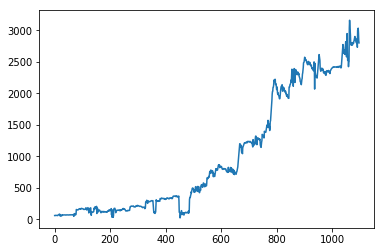

In [305]:
well_2 = well_2
index, values = outlier_finder(well_2, 17, multiplier)
well_2_clean = well_2.drop(index = index)
plt.plot(well_2_clean)

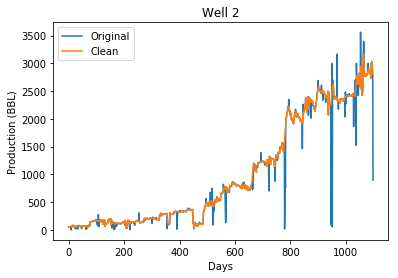

In [306]:
plt.plot(well_2)
plt.plot(well_2_clean)
plt.title('Well 2')
plt.xlabel('Days')
plt.ylabel('Production (BBL)')
plt.legend(['Original', 'Clean'])

In [307]:
#Save a the data into a cleaned csv file
well_2_clean.reset_index(inplace = True, drop = True)
well_2_clean.to_csv(r'C:\Users\csmid\Volve Project\well_2_clean.csv', index = None, header = True)